<a href="https://colab.research.google.com/github/joy254-arch/dsc-phase-1-project/blob/master/student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Final Project Submission

Please fill out:
* Student name: Joy Rotich
* Student pace: part time
* Scheduled project review date/time:
* Instructor name: Samwel Jane
* Blog post URL:


This jupyter file analyses and visualizes data from imdp. Hope you like it :😊

## Importing modules

In [1]:
# import the libraries you will need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Data Loading and Data Exploration



The data about the global movie sales and ratings are sourced from 3 different data sets.

In [2]:
# here we are reading the contents of the first 5 rows of '/content/bom.movie_gross.csv'
data1 = pd.read_csv('/content/bom.movie_gross.csv')
data1.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [3]:
# Displaying the last 5 rows of /content/bom.movie_gross.csv
data1.tail()

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


the data set consists of:


*   **Title** - title of the movie
*   **Studio** - the studio that produced the movie  
*  **Domestic_ gross** - the amount of money the movie made within the coutry
*  **Foreign_gross** - the amount of money the movie made in from foreign countries
*   **year** - the year the movie was released








In [13]:
# here we are reading the contents of the first 5 rows of '/content/imdb.title.basics.csv.gz'
data2 = pd.read_csv('/content/imdb.title.basics.csv.gz')
data2.head()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [14]:
# Displaying the last 5 rows of /content/imdb.title.basics.csv.gz
data2.tail()

,tconst,primary_title,original_title,start_year,runtime_minutes,genres
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,NaN
146143,tt9916754,Chico Albuquerque - Revelações,Chico Albuquerque - Revelações,2013,NaN,Documentary


In [15]:
# here we are reading the contents of the first 5 rows of '/content/imdb.title.ratings.csv.gz'
data3 = pd.read_csv('/content/imdb.title.ratings.csv.gz')
data3.head()

,tconst,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [16]:
# Displaying the last 5 rows of /content/imdb.title.ratings.csv.gz
data3.tail()

,tconst,averagerating,numvotes
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5
73855,tt9894098,6.3,128


# Cleaning the data

After loading the data, we explore the data in terms of missing values, duplicated rows and data types.


# Checking the number of duplicate rows on the different datasets

In [17]:
duplicated_rows = data1.duplicated().sum()
duplicated_rows
print("no.of duplicated rows in data1 : ",duplicated_rows)

no.of duplicated rows in data1 :  0


In [18]:
duplicated_rows = data2.duplicated().sum()
duplicated_rows
print("no.of duplicated rows in data2 : ",duplicated_rows)

no.of duplicated rows in data2 :  0


In [19]:
duplicated_rows = data3.duplicated().sum()
duplicated_rows
print("no.of duplicated rows in data3 : ",duplicated_rows)

no.of duplicated rows in data3 :  0


We have no duplicated rows in any of the datasets.

# Renaming Data

Renaming titles of data1 , data2, and data3 to make merging easier.

In [20]:
data1.rename(columns={'title' : 'original_title'}, inplace=True)
data2.rename(columns={'primary_title' : 'title'}, inplace=True)


In [21]:
# merging data1, data2 and data3
merged_data = pd.merge(pd.merge(data1, data2, on='original_title'), data3,)
merged_data

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,Loving Pablo,Uni.,22000.0,NaN,2018,tt4682788,Loving Pablo,2017,123.0,"Action,Biography,Crime",6.3,13988
2443,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,2017,101.0,Drama,5.9,1290
2444,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
2445,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance",5.9,9


In [22]:
# assigning merged data to the variable data
data = merged_data
data

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2442,Loving Pablo,Uni.,22000.0,NaN,2018,tt4682788,Loving Pablo,2017,123.0,"Action,Biography,Crime",6.3,13988
2443,The Escape,IFC,14000.0,NaN,2018,tt6069126,The Escape,2017,101.0,Drama,5.9,1290
2444,Souvenir,Strand,11400.0,NaN,2018,tt2387692,Souvenir,2016,90.0,"Drama,Music,Romance",6.0,823
2445,Souvenir,Strand,11400.0,NaN,2018,tt2389092,Souvenir,2014,86.0,"Comedy,Romance",5.9,9


#cleaning missing data

 this code identifies missing values in the  dataset, calculates the count of missing values per column, and then drops any rows with missing values to create a cleaned dataset

In [23]:
null_values = data.isnull()
null_count = null_values.sum()
print(null_count)
data= data.dropna()
data

original_title       0
studio               3
domestic_gross      18
foreign_gross      874
year                 0
tconst               0
title                0
start_year           0
runtime_minutes     45
genres               4
averagerating        0
numvotes             0
dtype: int64


,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2388,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
2389,I Still See You,LGF,1400.0,1500000,2018,tt2160105,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
2397,The Catcher Was a Spy,IFC,725000.0,229000,2018,tt4602066,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
2411,Time Freak,Grindstone,10000.0,256000,2018,tt6769280,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


# Checking the datatypes

In [24]:
# Checking the data types before cleaning, adjusting the data types, and checking it again.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1517 entries, 0 to 2435
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   original_title   1517 non-null   object 
 1   studio           1517 non-null   object 
 2   domestic_gross   1517 non-null   float64
 3   foreign_gross    1517 non-null   object 
 4   year             1517 non-null   int64  
 5   tconst           1517 non-null   object 
 6   title            1517 non-null   object 
 7   start_year       1517 non-null   int64  
 8   runtime_minutes  1517 non-null   float64
 9   genres           1517 non-null   object 
 10  averagerating    1517 non-null   float64
 11  numvotes         1517 non-null   int64  
dtypes: float64(3), int64(3), object(6)
memory usage: 154.1+ KB


The values in 'foreign_gross' column are type(object) instead of float64. We definately have to change this.

In [25]:
# Converted 'foreign_gross' to float
data['foreign_gross'] = data['foreign_gross'].astype(str).str.replace(',', '').astype(float)

<ipython-input-25-effa3c47212d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['foreign_gross'] = data['foreign_gross'].astype(str).str.replace(',', '').astype(float)


In [26]:
# to confirm this,
data['foreign_gross'].dtype


dtype('float64')

In [ ]:
data.describe()

,domestic_gross,foreign_gross,year,start_year,runtime_minutes,averagerating,numvotes
count,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000,1.517000e+03
mean,5.568644e+07,8.300011e+07,2013.719183,2013.669743,107.624918,6.426170,1.087133e+05
std,8.139691e+07,1.412765e+08,2.608133,2.640453,19.685080,1.004801,1.597964e+05
min,7.000000e+02,6.000000e+02,2010.000000,2010.000000,3.000000,1.600000,5.000000e+00
25%,3.900000e+06,5.500000e+06,2011.000000,2011.000000,95.000000,5.900000,1.162900e+04
50%,2.880000e+07,2.390000e+07,2014.000000,2014.000000,106.000000,6.500000,5.226600e+04
75%,6.920000e+07,8.800000e+07,2016.000000,2016.000000,118.000000,7.100000,1.299810e+05
max,7.001000e+08,9.464000e+08,2018.000000,2019.000000,184.000000,9.200000,1.841066e+06


In [27]:
data.head()


,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [ ]:
data.tail()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
2388,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
2389,I Still See You,LGF,1400.0,1500000.0,2018,tt2160105,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
2397,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,tt4602066,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
2411,Time Freak,Grindstone,10000.0,256000.0,2018,tt6769280,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455
2435,Antonio Lopez 1970: Sex Fashion & Disco,FM,43200.0,30000.0,2018,tt5792490,Antonio Lopez 1970: Sex Fashion & Disco,2017,95.0,"Biography,Documentary",6.5,102


# Findings

1. There are a lot of missing values in this data set and those rows containing null values are removed. Our data set was reduced from 2776 rows to 1638 rows
2. There are no duplicated rows
3. Most of the data types are already correct, however 'foriegn_gross' Should be in float.



# Data Analysis

After cleaning the data, we need to observe the descriptive of each numerical columns to see the distribution of the data. The distribution is important to determine which statistical test is appropriate for each analysis. It was found that all columns are not in normal distribution. Thus, we will only measure them using non-parametric tests that do not assume normality. As for the outliers, there are high potential of outliers but it is considered natural and not removed because this data represents sales of varying individual movies. In reality, there are some movies that sell huge amounts of copies and there are other movies that do not sell at all, as the sales are influenced by the types of movie, quality, marketing, etc. Thus, outliers are not analyzed nor removed for this project

In [28]:

data_clean = data.copy() # Create a copy of your DataFrame and name it data_clean

# Perform your cleaning operations on data_clean here, for example:
# data_clean = data_clean.dropna()

print('foreign_gross:')
print(data_clean['foreign_gross'].describe()) #.describe to show all descriptive statistic, which include mode, mean, and median.
print('foreign_gross Skewness:',data_clean['foreign_gross'].skew()) #to find the skewness
print('foreign_gross Kurtosis:',data_clean['foreign_gross'].kurtosis()) #to find the kurtosis
print()
print('domestic_gross:')
print(data_clean['domestic_gross'].describe()) #.describe to show all descriptive statistic, which include mode, mean, and median.
print('domestic_gross Skewness:',data_clean['domestic_gross'].skew()) #to find the skewness
print('domestic_gross Kurtosis:',data_clean['domestic_gross'].kurtosis()) #to find the kurtosis
print()


foreign_gross:
count    1.517000e+03
mean     8.300011e+07
std      1.412765e+08
min      6.000000e+02
25%      5.500000e+06
50%      2.390000e+07
75%      8.800000e+07
max      9.464000e+08
Name: foreign_gross, dtype: float64
foreign_gross Skewness: 2.825183982093383
foreign_gross Kurtosis: 8.968065808294629

domestic_gross:
count    1.517000e+03
mean     5.568644e+07
std      8.139691e+07
min      7.000000e+02
25%      3.900000e+06
50%      2.880000e+07
75%      6.920000e+07
max      7.001000e+08
Name: domestic_gross, dtype: float64
domestic_gross Skewness: 3.028649603675993
domestic_gross Kurtosis: 12.66740002456526



In [29]:
filtered_data = data[(data['year'] >= 2010) & (data['year'] <= 2020)]
filtered_data








,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690
...,...,...,...,...,...,...,...,...,...,...,...,...
2388,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,tt3576728,Bilal: A New Breed of Hero,2015,105.0,"Action,Adventure,Animation",8.0,16854
2389,I Still See You,LGF,1400.0,1500000.0,2018,tt2160105,I Still See You,2018,98.0,"Fantasy,Thriller",5.7,5010
2397,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,tt4602066,The Catcher Was a Spy,2018,98.0,"Biography,Drama,War",6.2,4653
2411,Time Freak,Grindstone,10000.0,256000.0,2018,tt6769280,Time Freak,2018,104.0,"Comedy,Drama,Romance",5.7,3455


# Visualizing the most popular genres in terms of sales

From the graph we are able to see the most popular genre to be Adventure,Animation,Comedy the second one being Action,Adventure,Sci-Fi and the third one to be Action,Adventure,Fantasy.

In [30]:
# Calculating total sales if it doesn't exist
if 'total_sales' not in filtered_data.columns:
    filtered_data['total_sales'] = filtered_data['domestic_gross'] + filtered_data['foreign_gross']

# Grouping the data by genre and calculate the total sales for each genre
genre_sales = filtered_data.groupby('genres')['total_sales'].sum().reset_index()

# Sorting the genres by total sales in descending order and select the top 10 genres
top_10_genres = genre_sales.sort_values('total_sales', ascending=False).head(10)

# Create a bar chart using Altair
import altair as alt
chart = alt.Chart(top_10_genres).mark_bar().encode(
    x=alt.X('genres', sort='-y', title='Genre'),  # Sorting genres by total sales
    y=alt.Y('total_sales', title='Total Sales')
).properties(
    title='Top 10 Genres by Total Sales',
    width=600,
    height=400
)

chart = chart.configure_axis(
    labelFontSize=12,
    titleFontSize=14
)

# displaying the chart
chart

alt.Chart(...)

# collecting data on the ratings of each genre

Here, we are trying to find out the most popular genres in terms of how they have been rated.

In [31]:
data_clean.head()


,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [47]:
import altair as alt
top_genres = data_clean.groupby('genres')['averagerating'].mean().sort_values(ascending=False).head(10).index.tolist()
chart = alt.Chart(data_clean[data_clean['genres'].isin(top_genres)]).mark_bar().encode(
    x='genres',
    y='mean(averagerating)'
).properties(
    width=600,
    height=400,
    title='Top 10 Genres by Average Rating'
)

chart = chart.configure_axis(
    labelFontSize=12,
    titleFontSize=14
)
chart


alt.Chart(...)

# Genres with the highest Domestic gross

We also need to consider the popular genres that have the highest sales from within the country to ensure there is profit domestically as well.

In [34]:
data.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).head(10)

genres
Action,Adventure,Sci-Fi       9.934900e+09
Adventure,Animation,Comedy    9.564989e+09
Action,Adventure,Fantasy      3.758400e+09
Action,Adventure,Comedy       3.162300e+09
Comedy                        2.318253e+09
Action,Adventure,Animation    2.156515e+09
Drama                         2.093828e+09
Action,Adventure,Thriller     1.851100e+09
Comedy,Romance                1.788988e+09
Action,Comedy,Crime           1.781294e+09
Name: domestic_gross, dtype: float64

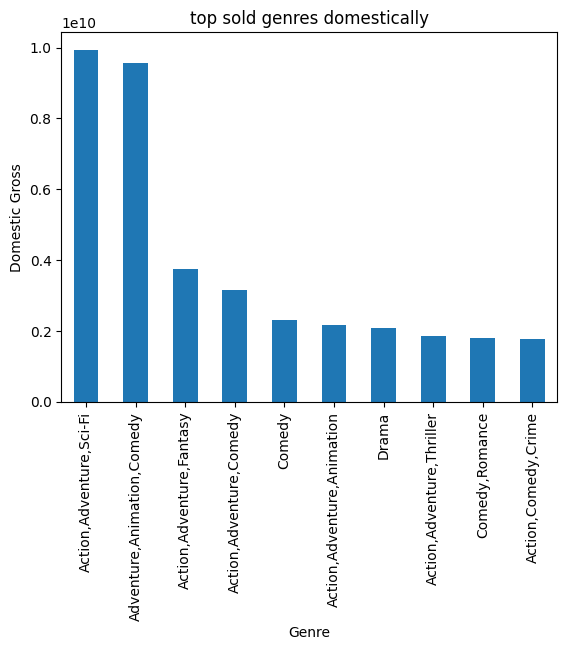

In [35]:
data.groupby('genres')['domestic_gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Domestic Gross')
plt.title('top sold genres domestically')
plt.show()

From the visualization above, we are able to see that Action, Adventure, Sci-Fi has been the most sold genre domestically and Action,Comedy,Crime has the least sales.

# Genres with the highest International gross visualization

We need to find out which genres are the most popular in terms of sales internationally to enable Microsoft to make decisions which will make their movies profitable in the international markets as well.

In [36]:
Foreign_gross = data.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).head(10)
Foreign_gross

genres
Adventure,Animation,Comedy    1.774260e+10
Action,Adventure,Sci-Fi       1.507450e+10
Action,Adventure,Fantasy      8.108800e+09
Action,Adventure,Comedy       5.376200e+09
Action,Adventure,Thriller     4.748300e+09
Action,Adventure,Animation    4.148700e+09
Action,Adventure,Drama        3.319632e+09
Drama                         2.324525e+09
Action,Thriller               2.281900e+09
Adventure,Family,Fantasy      2.156400e+09
Name: foreign_gross, dtype: float64

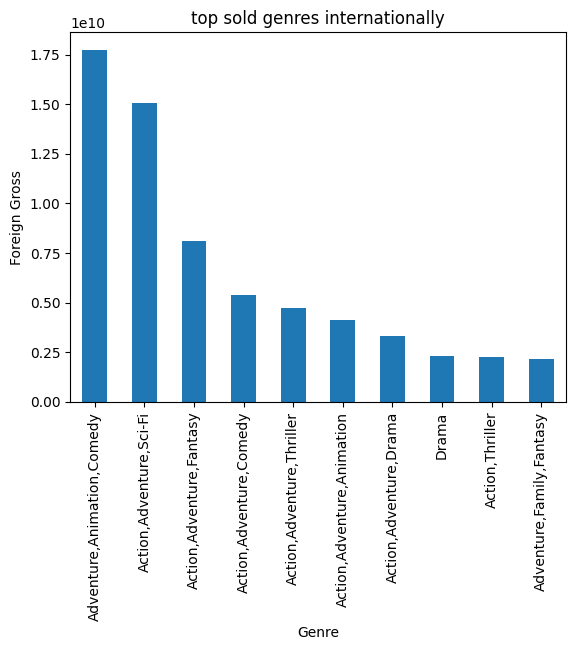

In [37]:
data.groupby('genres')['foreign_gross'].sum().sort_values(ascending=False).head(10).plot(kind='bar')
plt.xlabel('Genre')
plt.ylabel('Foreign Gross')
plt.title('top sold genres internationally')
plt.show()

From the visuaization above, we are able to see that Adventure,Animation,Comedy has the most sales internationally while the genre with the

---

least sales is Adventure,Family,Fantasy.

In [ ]:
data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


From the visual representation above, we are able to see that

# Popular genres both domestically and internationally visualization.

Microsoft also has to know the genres that will be profitable both internationally and locally to enable them to satisfy both local and foreign audiences, it's basically killing two birds with one stone.

In [41]:
data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [46]:
# Calculating total domestic and foreign gross for each genre
genre_gross = data.groupby('genres')[['domestic_gross', 'foreign_gross']].sum()

# Sorting by total domestic and foreign gross in descending order
genre_gross_sorted = genre_gross.sort_values(by=['domestic_gross', 'foreign_gross'], ascending=False)

# Selecting top 10 genres
top_10_genres = genre_gross_sorted.head(10)

# Creating a bar chart
import altair as alt
alt.Chart(top_10_genres.reset_index()).mark_bar().encode(
    x='genres',
    y='domestic_gross',
    color='genres'
).properties(
    title='Top 10 Genres by Domestic and Foreign Gross'
)


alt.Chart(...)

The visualization shows that the genres that are the most sold locally are also getting high sales in the outside market and the same for the highest sold genre in the foreign markets.


# Correlation between the number of votes and the foreign gross

 we want to know the correlation between the number of votes and the foreign gross and see how they affect eachother.

In [38]:
# using a scatter plot to show the correlation between the number of votes and the Foreign gross

import altair as alt
alt.Chart(data).mark_point().encode(
    alt.X('numvotes', title='Number of Votes'),
    alt.Y('foreign_gross', title='Foreign Gross (in Dollars)')
).properties(
    title='Correlation between Number of Votes and Foreign Gross'
)


alt.Chart(...)

We are able to see that most dots are in the bottom left corner meaning (few votes, low foreign gross). As you move to the top right, dots spread out (more votes, higher foreign gross).
Therefore, there’s a positive connection—more votes often mean higher foreign revenue for movies with higher votes.

In [39]:
data.head()

,original_title,studio,domestic_gross,foreign_gross,year,tconst,title,start_year,runtime_minutes,genres,averagerating,numvotes
0,Toy Story 3,BV,415000000.0,652000000.0,2010,tt0435761,Toy Story 3,2010,103.0,"Adventure,Animation,Comedy",8.3,682218
1,Inception,WB,292600000.0,535700000.0,2010,tt1375666,Inception,2010,148.0,"Action,Adventure,Sci-Fi",8.8,1841066
2,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,tt0892791,Shrek Forever After,2010,93.0,"Adventure,Animation,Comedy",6.3,167532
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,tt1325004,The Twilight Saga: Eclipse,2010,124.0,"Adventure,Drama,Fantasy",5.0,211733
4,Iron Man 2,Par.,312400000.0,311500000.0,2010,tt1228705,Iron Man 2,2010,124.0,"Action,Adventure,Sci-Fi",7.0,657690


In [40]:
# plotting a scatter plot to show the correlation between the domestic gross and the Average rating.

import altair as alt
alt.Chart(data).mark_point().encode(
    alt.X('domestic_gross', title='Domestic Gross (in $)'),
    alt.Y('averagerating', title='Average Rating'),
).properties(
    title='Correlation between Domestic Gross and Average Rating'
)


alt.Chart(...)

Lastly, we are able to see that most dots are in the bottom left corner meaning (few votes, low foreign gross). As you move to the top right, dots spread out (more votes, higher foreign gross). Therefore, there’s a positive connection—more votes often mean higher domestic revenue for movies with higher votes.

# Conclusion

The most promising movie genre in terms of sales during 2010 - 2020 period is Adventure , Animation , Comedy with almost 28 million dollars made,
The movie industry possesed a very good stability over the year due to the fact that the total sales is linear to the numbers of movies released. It was concluded that, the number of votes a movie got showed a significant, positive correlation with the international sales. Therefore, it is concluded that having higher number of votes will increase the likelihood of our movie generating higher sales,

The genres Adventure,Animation,Comedy and Action, Adventure, Sci-Fi do well both domestically and internationally.
